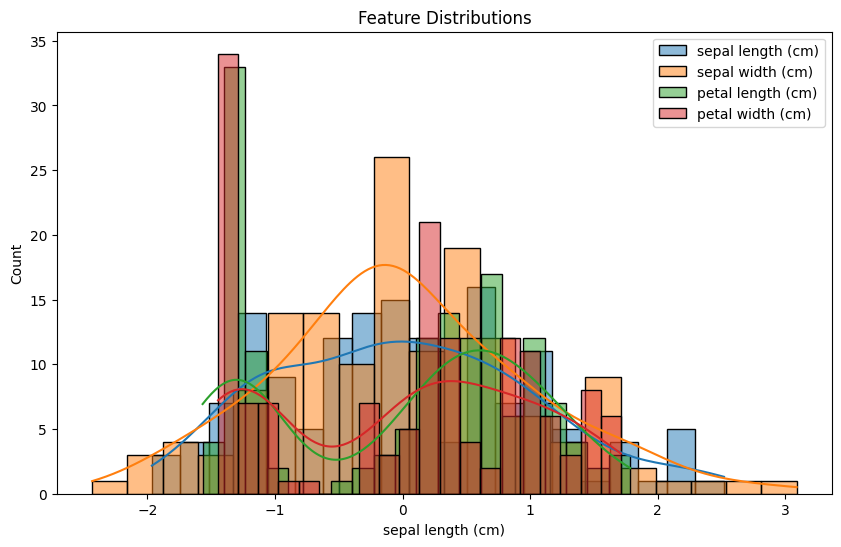

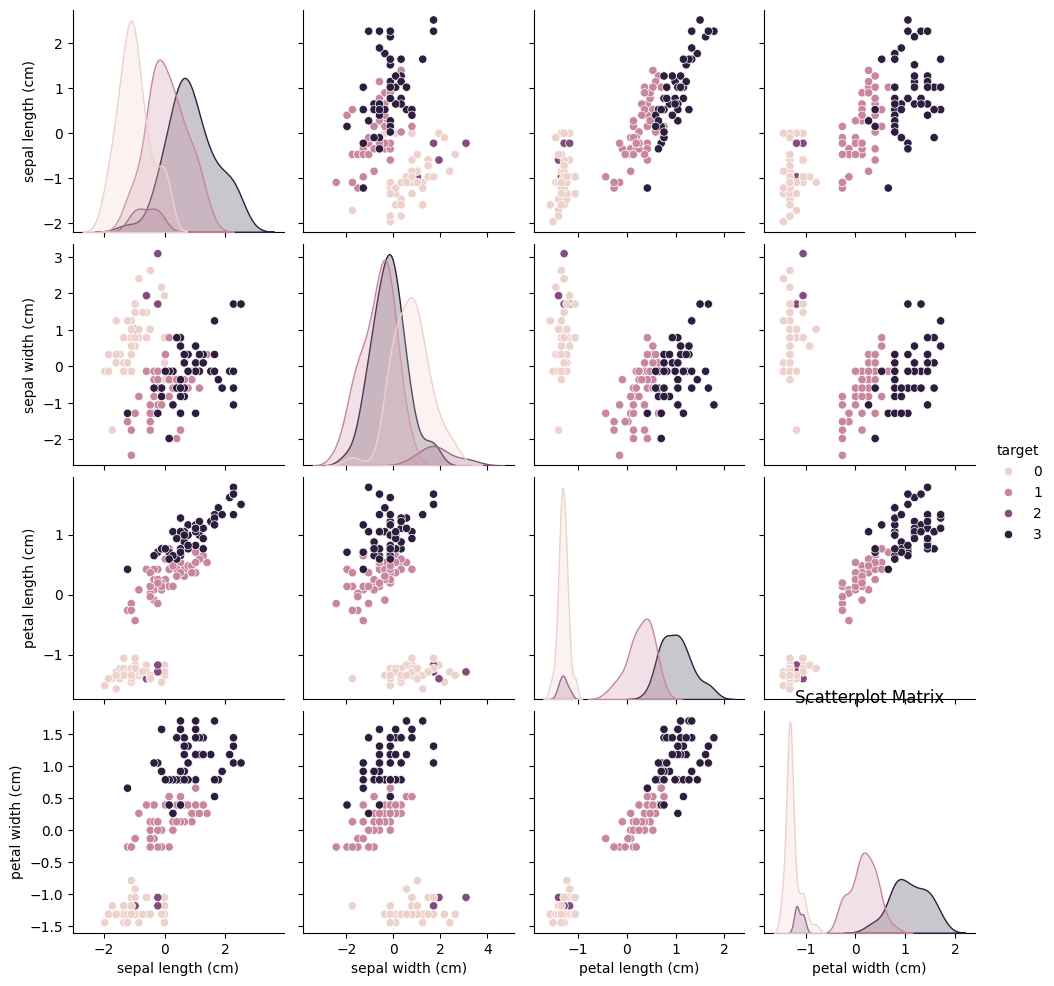

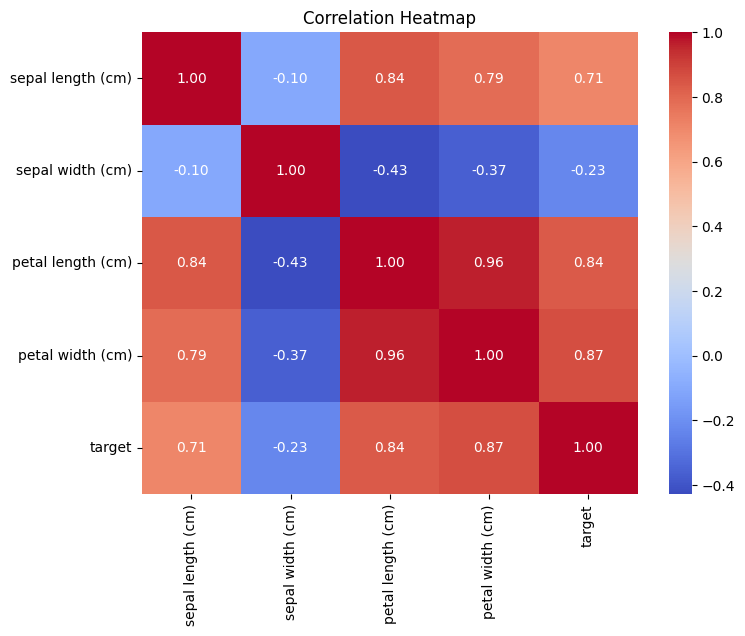

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load a sample dataset (using Iris dataset)
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Introducing some missing values for demonstration
df.iloc[5:10, 0] = np.nan
df.iloc[15:20, -1] = np.nan

# Step 2: Handling missing data
# Replacing missing values with mean for numerical columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# Step 3: Encoding categorical data (if applicable)
# The 'target' column is already numerical but let's encode it for demonstration
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'].astype(str))

# Step 4: Feature scaling
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Step 5: Plot distribution of features
plt.figure(figsize=(10, 6))
for column in df.columns[:-1]:
    sns.histplot(df[column], kde=True, bins=20, label=column)
plt.legend()
plt.title('Feature Distributions')
plt.show()

# Step 6: Create scatterplot to understand relationships between features
sns.pairplot(df, hue='target', diag_kind='kde')
plt.title("Scatterplot Matrix")
plt.show()

# Step 7: Use correlation heatmap to find relationships between multiple features
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()